In [1]:
 def J_bivariante(ff1,ff2):
    def distancia(p1, p2):
        return np.linalg.norm(np.array(p2)-np.array(p1))
    vectores = []
    for i in range(len(ff1)-1):
        p1 = [ff1[i], ff2[i]]
        p2 = [ff1[i+1], ff2[i+1]]
        cuadrante = [[p2[0]-p1[0], p2[1]-p1[1]], [p2[0]-p1[0], p2[1]+2*np.pi-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]],[p2[0]+2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-p1[0],p2[1]-2*np.pi-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]]]
        distancia1 = [distancia(p1,c) for c in cuadrante]
        p2=cuadrante[np.argmin(distancia1)]
        vectores.append([p2[0]-p1[0],p2[1]-p1[1]])
    angulos=[]
    for i in range(len(vectores)-1):
        v1=vectores[i]
        v2=vectores[i+1]
        v1_norm=v1/np.linalg.norm(v1)
        v2_norm=v2/np.linalg.norm(v2)
        angulo=np.arccos(np.clip(np.dot(v1_norm,v2_norm),-1.0,1.0))
        cruz=v1[0]*v2[1]-v1[1]*v2[0]
        if cruz>0:
            angulo=np.pi-angulo
        if cruz==0 and angulo==0:
            angulo=angulo
        if cruz==0 and angulo<0:
            angulo=np.pi
        if cruz<0:
            angulo=angulo+np.pi
        angulos.append(angulo)
    e=[]
    for k in range(len(angulos)):
        e.append(np.exp(angulos[k]*1j))
    e1=np.sum(e)/len(angulos)
    J=1.-np.abs(e1.real)
    return J

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def original_signal(N):
    xi1 = np.random.uniform(0, 2*np.pi, N)
    xi2 = np.random.uniform(0, 2*np.pi, N)

    diff_OG = xi1 - xi2
    OG = np.column_stack((xi1, xi2)) 

    return OG, diff_OG

def subsequent_signals(N):
    yi1 = np.random.uniform(0, 2*np.pi, N)
    yi2 = yi1 - diff_OG
    array = np.column_stack((yi1, yi2))

    return array

OG, diff_OG = original_signal(2000)
# np.save('Random/OG.npy', OG)
for i in range(99):
    array = subsequent_signals(2000)
    # np.save('Random/phase ' + str(i+2) + '.npy', array)    
    
print(np.shape(OG))

(2000, 2)


In [45]:
import os

# carpeta = r'Random'
# archivos_en_carpeta = os.listdir(carpeta)
# Jotas = np.zeros((100,198))

# for i, archivo in enumerate(archivos_en_carpeta):
#     Jota_array = []
#     ruta_completa = os.path.join(carpeta, archivo)
#     array = np.load(ruta_completa)
#     for N in range(20, 2000, 10):
#         J = J_bivariante(array[:N,0],array[:N,1])
#         Jota_array.append(J)
#     Jotas[i,:] = Jota_array
#     print(archivo)


#Para calcular J de los datos random

OG.npy
phase 10.npy
phase 100.npy
phase 11.npy
phase 12.npy
phase 13.npy
phase 14.npy
phase 15.npy
phase 16.npy
phase 17.npy
phase 18.npy
phase 19.npy
phase 2.npy
phase 20.npy
phase 21.npy
phase 22.npy
phase 23.npy
phase 24.npy
phase 25.npy
phase 26.npy
phase 27.npy
phase 28.npy
phase 29.npy
phase 3.npy
phase 30.npy
phase 31.npy
phase 32.npy
phase 33.npy
phase 34.npy
phase 35.npy
phase 36.npy
phase 37.npy
phase 38.npy
phase 39.npy
phase 4.npy
phase 40.npy
phase 41.npy
phase 42.npy
phase 43.npy
phase 44.npy
phase 45.npy
phase 46.npy
phase 47.npy
phase 48.npy
phase 49.npy
phase 5.npy
phase 50.npy
phase 51.npy
phase 52.npy
phase 53.npy
phase 54.npy
phase 55.npy
phase 56.npy
phase 57.npy
phase 58.npy
phase 59.npy
phase 6.npy
phase 60.npy
phase 61.npy
phase 62.npy
phase 63.npy
phase 64.npy
phase 65.npy
phase 66.npy
phase 67.npy
phase 68.npy
phase 69.npy
phase 7.npy
phase 70.npy
phase 71.npy
phase 72.npy
phase 73.npy
phase 74.npy
phase 75.npy
phase 76.npy
phase 77.npy
phase 78.npy
phase 79.n

In [19]:
import pandas as pd

df = pd.read_csv('Mozart_Sonata.txt')

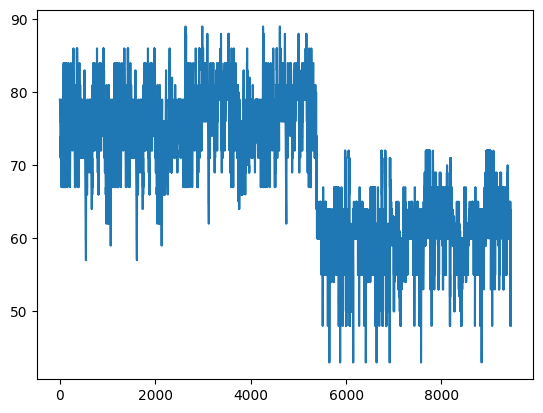

In [22]:
plt.plot(df.squeeze())

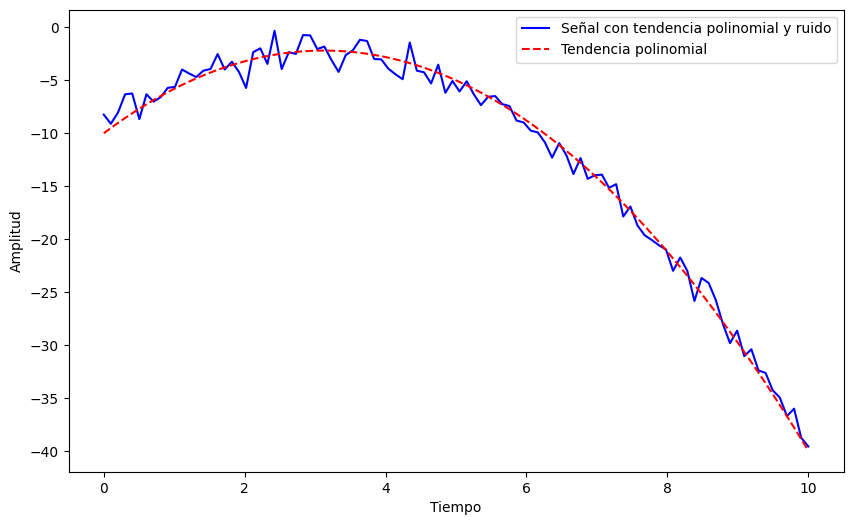

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la señal
np.random.seed(0)  # Para reproducibilidad

# Definimos los parámetros de la señal
n_points = 100  # Número de puntos de datos
x = np.linspace(0, 10, n_points)  # Vector de tiempo

# Coeficientes del polinomio (por ejemplo, y = -0.5*x^2 + 5*x - 10)
# Esto crea una parábola que sube y luego baja
coefficients = [-0.8, 5, -10]

# Generación de la tendencia polinomial
polynomial_trend = np.polyval(coefficients, x)

# Agregar ruido a la señal
noise = np.random.normal(scale=1.0, size=n_points)
signal_with_trend = polynomial_trend + noise

# Visualización de la señal
plt.figure(figsize=(10, 6))
plt.plot(x, signal_with_trend, label='Señal con tendencia polinomial y ruido', color='b')
plt.plot(x, polynomial_trend, label='Tendencia polinomial', color='r', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
# plt.title('Señal No Estacionaria con Tendencia Polinomial Ascendente y Descendente')
plt.legend()
plt.show()


In [31]:
import numpy as np
import os

import numpy as np
import matplotlib.pyplot as plt

def DFA(time_series, min_scale=4, max_scale = 50, scale_res=30):
    """
    Realiza el Análisis de Fluctuaciones Detrended (DFA) en una serie temporal.
    
    Parámetros:
    - time_series: la serie temporal a analizar.
    - min_scale: el tamaño mínimo de ventana (escala).
    - max_scale: el tamaño máximo de ventana (escala).
    - scale_res: número de escalas a evaluar entre min_scale y max_scale.
    
    Retorna:
    - scales: los tamaños de ventana evaluados.
    - flucts: las fluctuaciones promedio para cada escala.
    """
    if max_scale is None:
        max_scale = len(time_series) // 4
    
    # Crear escalas logarítmicamente espaciadas
    scales = np.logspace(np.log10(min_scale), np.log10(max_scale), scale_res).astype(int)

    # Restar la media de la serie temporal
    time_series = time_series - np.mean(time_series)
    
    # Calculamos el perfil de la serie temporal
    profile = np.cumsum(time_series)
    plt.plot(time_series)
    plt.show()
    plt.plot(profile)
    flucts = []
    for scale in scales:
        # Dividir el perfil en ventanas de longitud "scale"
        segments = len(profile) // scale
        local_rms = []
        for i in range(segments):
            # Obtener el segmento correspondiente
            segment = profile[i*scale:(i+1)*scale]
            # Ajustar un polinomio (por defecto lineal)
            poly_coeffs = np.polyfit(np.arange(scale), segment, 2)
            # Restar la tendencia
            trend = np.polyval(poly_coeffs, np.arange(scale))
            # Calcular la RMS (root mean square) de las fluctuaciones
            fluct = np.sqrt(np.mean((segment - trend)**2))
            local_rms.append(fluct)
        # Promedio de las fluctuaciones RMS para esta escala
        flucts.append(np.mean(local_rms))
    
    return scales, flucts

def calculate_increment_series(time_series):
    """Calcula la serie de incrementos."""
    return np.diff(time_series)

def decompose_series(increment_series):
    """Descompone la serie de incrementos en magnitudes y signos, y resta las medias."""
    magnitude_series = np.abs(increment_series)
    sign_series = np.sign(increment_series)
    
    # Restar las medias
    magnitude_series -= np.mean(magnitude_series)
    sign_series -= np.mean(sign_series)
    
    return magnitude_series, sign_series

def integrate_series(series):
    """Integra la serie para asegurar que esté positivamente correlacionada."""
    return np.cumsum(series)

def dfa(series, scale_range):
    """Implementa el DFA para calcular el exponente de escala."""
    flucts = []

    for scale in scale_range:
        segments = len(series) // scale
        rms = []

        for i in range(segments):
            segment = series[i * scale:(i + 1) * scale]
            # Ajuste polinomial (detrend) de grado 1
            coeffs = np.polyfit(np.arange(scale), segment, 1)
            trend = np.polyval(coeffs, np.arange(scale))
            fluct = np.sqrt(np.mean((segment - trend) ** 2))
            rms.append(fluct)
        
        flucts.append(np.mean(rms))

    # Ajuste lineal en escala log-log
    log_scale = np.log2(scale_range)
    log_flucts = np.log2(flucts)
    slope, _ = np.polyfit(log_scale, log_flucts, 1)
    
    return flucts, slope

def plot_loglog(scale_range, fluctuations, title="Log-Log Plot of DFA Analysis"):
    """
    Grafica un log-log plot para los resultados de DFA.
    
    :param scale_range: Array con los tamaños de escala (ventanas).
    :param fluctuations: Array con las fluctuaciones calculadas para cada escala.
    :param title: Título de la gráfica.
    """
    # Convertir a escala logarítmica
    log_scale = np.log2(scale_range)
    log_fluctuations = np.log2(fluctuations)

    # Crear la gráfica
    plt.figure(figsize=(8, 6))
    plt.scatter(log_scale, log_fluctuations, color='blue', edgecolors='black', alpha=0.7)
    
    # Ajustar una línea recta para encontrar la pendiente (exponente)
    slope, intercept = np.polyfit(log_scale, log_fluctuations, 1)
    plt.plot(log_scale, slope * log_scale + intercept, color='red', linestyle='--', 
             label=f'Ajuste lineal: pendiente = {slope:.2f}')
    
    # Configuración de la gráfica
    plt.xlabel('log2(Escala)')
    plt.ylabel('log2(Fluctuaciones)')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5, axis='both')
    plt.legend()
    plt.show()

def mdfa(time_series, scale_range):
    """
    Implementación del MDFA siguiendo los pasos especificados.
    :param time_series: Serie temporal (numpy array).
    :param scale_range: Rango de tamaños de ventana para el análisis de escala.
    :return: Exponentes de escala para la serie de magnitudes y signos.
    """
    # Paso 1: Calcular la serie de incrementos
    increment_series = calculate_increment_series(time_series)
    
    # Paso 2: Descomponer la serie de incrementos en magnitud y signo, restar medias
    magnitude_series, sign_series = decompose_series(increment_series)
    
    # Paso 3: Integrar las series de magnitudes y signos
    integrated_magnitude = integrate_series(magnitude_series)
    integrated_sign = integrate_series(sign_series)
    
    # Paso 4: Aplicar DFA a ambas series integradas
    flucts_magnitude, alpha_magnitude = dfa(integrated_magnitude, scale_range)
    flucts_sign, alpha_sign = dfa(integrated_sign, scale_range)

    # Paso 5: Graficar
    plot_loglog(scale_range, flucts_magnitude)
    
    return alpha_magnitude, alpha_sign, flucts_magnitude, flucts_sign

def iaaft(time_series, max_iter=1000, tol=1e-8):
    """
    Genera una serie temporal surrogada usando el algoritmo IAAFT.
    
    :param time_series: Serie temporal original (numpy array).
    :param max_iter: Número máximo de iteraciones permitidas.
    :param tol: Tolerancia para la convergencia del algoritmo.
    :return: Serie surrogada (numpy array).
    """
    # Paso 1: Calcular la transformada de Fourier del tiempo serie
    original_fft = np.fft.fft(time_series)
    original_amplitude = np.abs(original_fft)
    original_phase = np.angle(original_fft)
    
    # Paso 2: Crear una permutación aleatoria de la serie original
    surrogate = np.random.permutation(time_series)
    
    # Ordenar los valores de la serie original
    sorted_original = np.sort(time_series)
    
    prev_surrogate = surrogate.copy()
    
    for i in range(max_iter):
        # Ajustar la fase: realizar la FFT y conservar la fase original
        surrogate_fft = np.fft.fft(surrogate)
        surrogate_phase = np.angle(surrogate_fft)
        
        # Crear una nueva serie combinando la magnitud original con la fase actual
        new_fft = original_amplitude * np.exp(1j * surrogate_phase)
        surrogate = np.fft.ifft(new_fft).real
        
        # Ajustar la amplitud: Reordenar los valores del surrogate para coincidir con los del original
        surrogate = sorted_original[np.argsort(np.argsort(surrogate))]
        
        # Chequear convergencia
        diff = np.linalg.norm(surrogate - prev_surrogate)
        if diff < tol:
            break
        
        prev_surrogate = surrogate.copy()
    
    return surrogate